In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("spam.csv")
df.shape

(5572, 2)

In [37]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [39]:
# There is a class imbalance

In [40]:
from sklearn.model_selection import train_test_split

X = df["Message"]
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [41]:
# Ml models dont understand texts, so we need to convert messages text to numbers using count vectorizer

## CountVectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

In [43]:
X_train_count = v.fit_transform(X_train)
X_train_count

<4457x7705 sparse matrix of type '<class 'numpy.int64'>'
	with 59063 stored elements in Compressed Sparse Row format>

In [44]:
X_train_count.toarray()[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
len(X_train_count.toarray()[1])        # total unique words/vocabulary in all the spam and ham messages is 7705

7705

In [60]:
X_test_count = v.transform(X_test)

# Model Training

In [64]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
# MultinomialNB is suitable for the cases where features are the frequency of words in a text. Widely used in text classification.
# GaussianNB is suitable for the cases where features have continuous values that are normally distributed.
#BernoulliNB is suitable for the cases where features are binary (0 or 1), such as in text classification where only presence 
#or absence of words are considered

In [66]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [68]:
y_pred = model.predict(X_test_count)

# Model Evaluation

In [74]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)

print(cr)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)

[[967   3]
 [  6 139]]


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

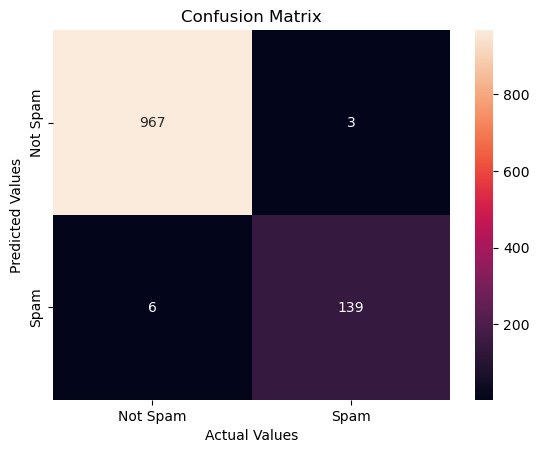

In [95]:
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam','Spam'],yticklabels=['Not Spam','Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Testing Model on unseen data

In [100]:
emails = [
    "Hey mohan, can we get together to watch football game tomorrow",
    "Upto 20% discount on parking, exclusive offer just for you, Dont miss this reward"]

emails_count = v.transform(emails)

model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [102]:
model.predict_proba(emails_count)

array([[9.99980509e-01, 1.94913008e-05],
       [1.16454213e-02, 9.88354579e-01]])

In [104]:
1.16454213e-02

0.0116454213

In [106]:
9.99980509e-01

0.999980509

# Using Sklearn Pipeline

In [109]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('count_vectorizer',CountVectorizer()),
    ('nb_classifier',MultinomialNB())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

In [111]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

